<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/06_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2 Pastas python package
Pastas is a new and open source Python package for the analysis of hydrogeological time series. The objective of Pastas is twofold: to provide a scientific framework to develop and test new methods, and to provide a reliable ready-to-use software tool for groundwater practitioners. For technical details of the package, please refer to https://doi.org/10.1111/gwat.12925 and https://github.com/pastas/pastas. 

First we install pastas package

In [10]:
pip install pastas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 4.3 MB/s 


Import the pastas and pandas

In [11]:
import pastas as ps

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Read the time series

In [18]:
rain = pd.read_csv('https://raw.githubusercontent.com/tomersk/python-applications/main/rain.csv',parse_dates=['Date'], index_col='Date', squeeze=True)
evap = pd.read_csv('https://raw.githubusercontent.com/tomersk/python-applications/main/evap.csv',parse_dates=['Date'], index_col='Date', squeeze=True)
obs = pd.read_csv('https://raw.githubusercontent.com/tomersk/python-applications/main/obs.csv',parse_dates=['Date'], index_col='Date', squeeze=True)

In [ ]:
#obs = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/obs.csv',parse_dates=['Date'], index_col='Date', squeeze=True)
#rain = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/rain.csv', parse_dates=['Date'], index_col='Date', squeeze=True)
#evap = pd.read_csv('/content/drive/MyDrive/Python_in_Hydrology/Data/pastas_data/example_1/evap.csv', parse_dates=['Date'], index_col='Date', squeeze=True)

ValueError: ignored

Create a model object

In [19]:
ml = ps.Model(obs, name='Karnataka')


INFO: Inferred frequency for time series obs: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series obs: freq=MS


Add recharge model

In [20]:
rm = ps.RechargeModel(rain, evap, ps.Gamma, name='recharge')
ml.add_stressmodel(rm)

INFO: Inferred frequency for time series rain: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series rain: freq=MS
INFO: Time series evap updated to dtype float.
INFO:pastas.timeseries:Time series evap updated to dtype float.
INFO: Inferred frequency for time series evap: freq=MS
INFO:pastas.timeseries:Inferred frequency for time series evap: freq=MS
INFO: Time Series rain were sampled up using bfill.
INFO:pastas.timeseries:Time Series rain were sampled up using bfill.
INFO: Time Series evap were sampled up using bfill.
INFO:pastas.timeseries:Time Series evap were sampled up using bfill.


Estimate model parameters

In [21]:
ml.solve(tmax='1984')

INFO: Time Series rain were sampled up using bfill.
INFO:pastas.timeseries:Time Series rain were sampled up using bfill.
INFO: Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO: Time Series evap were sampled up using bfill.
INFO:pastas.timeseries:Time Series evap were sampled up using bfill.
INFO: Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.


Fit report Karnataka                Fit Statistics
nfev    35                     EVP           22.05
nobs    49                     R2             0.20
noise   True                   RMSE           1.95
tmin    1980-01-01 00:00:00    AIC           30.43
tmax    1984-01-01 00:00:00    BIC           41.78
freq    D                      Obj           35.69
warmup  3650 days 00:00:00     ___                
solver  LeastSquares           Interp.          No

Parameters (6 optimized)
                optimal    stderr    initial  vary
recharge_A     0.099624   ±62.40%   0.013957  True
recharge_n     7.485870   ±56.07%   1.000000  True
recharge_a    43.236594   ±57.49%  10.000000  True
recharge_f    -0.493137  ±185.05%  -1.000000  True
constant_d     4.760298  ±346.69%   5.013542  True
noise_alpha  129.964654   ±35.45%  31.000000  True


In this example, tmax='1984' is used, meaning that the model is calibrated on the available head observations up to 1984.

Visualize model results

INFO: Time Series rain were sampled up using bfill.
INFO:pastas.timeseries:Time Series rain were sampled up using bfill.
INFO: Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO: Time Series evap were sampled up using bfill.
INFO:pastas.timeseries:Time Series evap were sampled up using bfill.
INFO: Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.


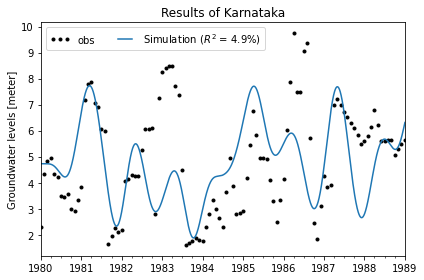

In [22]:
ml.plot(tmax='1989')

Analyze residuals and noise

INFO: Time Series rain were sampled up using bfill.
INFO:pastas.timeseries:Time Series rain were sampled up using bfill.
INFO: Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series rain was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO: Time Series evap were sampled up using bfill.
INFO:pastas.timeseries:Time Series evap were sampled up using bfill.
INFO: Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.
INFO:pastas.timeseries:Time Series evap was extended to 1970-01-03 00:00:00 with the mean value of the time series.


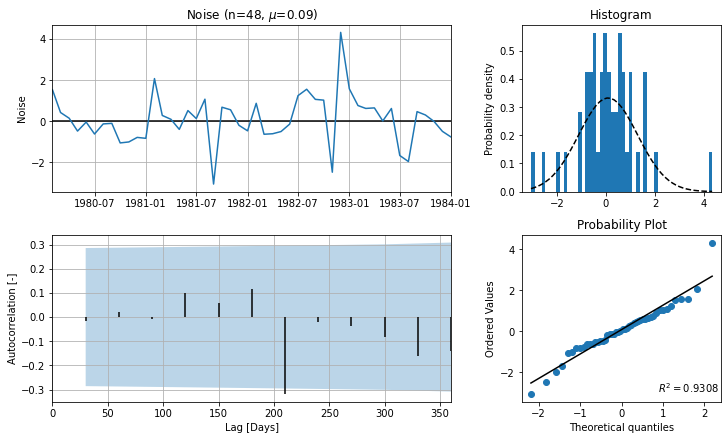

In [23]:
ml.plots.diagnostics()